<a href="https://colab.research.google.com/github/btbcy/HYLee_ML_HW/blob/master/hw3_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
# import os
# os.chdir("gdrive/My Drive/Colab Notebooks/Hung-yi Lee HW/HW3_CNN") #更改路徑
# os.getcwd() #查看當前路徑

# unzip

In [2]:
# zip_path = 'gdrive/My Drive/Colab Notebooks/Hung-yi Lee HW/HW3_CNN/food-11.zip'
!cp 'gdrive/My Drive/Colab Notebooks/Hung-yi Lee HW/HW3_CNN/food-11.zip' .
!unzip -q food-11.zip
!rm food-11.zip

# import

In [3]:
import os
import numpy as np
import cv2
# import time

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# read data

In [4]:
def readfile(path, label):
    # label 是一個 boolean variable，代表需不需要回傳 y 值
    image_dir = sorted(os.listdir(path))
    # x = np.zeros((len(image_dir), 128, 128, 3), dtype=np.uint8)
    x = np.zeros((len(image_dir), 128, 128, 3), dtype=np.float32)
    y = np.zeros((len(image_dir)), dtype=np.uint8)
    for i, file in enumerate(image_dir):
        img = cv2.imread(os.path.join(path, file))
        x[i, :, :] = cv2.resize(img,(128, 128)) * 1.0 / 255.0
        # do normalization on augmentation
        # x[i, :, :] = cv2.resize(img,(128, 128))
        if label:
          # keras.utils.to_categorical(int(file.split("_")[0]), num_classes=11)
          y[i] = int(file.split("_")[0])
    if label:
      return x, y
    else:
      return x

In [5]:
# 分別將 training set、validation set、testing set 用 readfile 函式讀進來
workspace_dir = './food-11'
print("Reading data")
train_x, train_y = readfile(os.path.join(workspace_dir, "training"), True)
print("Size of training data = {}".format(len(train_x)))
val_x, val_y = readfile(os.path.join(workspace_dir, "validation"), True)
print("Size of validation data = {}".format(len(val_x)))
test_x = readfile(os.path.join(workspace_dir, "testing"), False)
print("Size of Testing data = {}".format(len(test_x)))

Reading data
Size of training data = 9866
Size of validation data = 3430
Size of Testing data = 3347


## test data

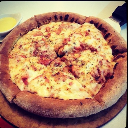

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(train_x[1]*255)

In [ ]:
train_x[1]

array([[[0.03137255, 0.01568628, 0.01960784],
        [0.02352941, 0.01176471, 0.01176471],
        [0.01568628, 0.00784314, 0.00784314],
        ...,
        [0.03921569, 0.01176471, 0.00784314],
        [0.        , 0.00392157, 0.        ],
        [0.01960784, 0.        , 0.00784314]],

       [[0.03137255, 0.05490196, 0.03529412],
        [0.5058824 , 0.54901963, 0.5137255 ],
        [0.58431375, 0.6313726 , 0.5921569 ],
        ...,
        [0.02745098, 0.03529412, 0.04313726],
        [0.        , 0.00784314, 0.00784314],
        [0.01960784, 0.        , 0.00392157]],

       [[0.61960787, 0.6901961 , 0.6392157 ],
        [0.6117647 , 0.6862745 , 0.63529414],
        [0.60784316, 0.6901961 , 0.6313726 ],
        ...,
        [0.35686275, 0.34117648, 0.3529412 ],
        [0.02352941, 0.00784314, 0.01176471],
        [0.01176471, 0.        , 0.        ]],

       ...,

       [[0.11372549, 0.01176471, 0.3764706 ],
        [0.11372549, 0.01960784, 0.36078432],
        [0.11764706, 0

## preprocessing

In [6]:
# # Normalize pixel values to be between 0 and 1
# train_x = train_x / 255
# val_x = val_x / 255
# test_x = test_x / 255

# Converts a class vector (integers) to binary class matrix.
train_y = keras.utils.to_categorical(train_y, num_classes=11)
val_y = keras.utils.to_categorical(val_y, num_classes=11)

In [7]:
index = np.arange(len(train_x))
np.random.shuffle(index)
train_x = train_x[index]
train_y = train_y[index]

# augmentation

In [48]:
train_datagen = keras.preprocessing.image.ImageDataGenerator(
    # featurewise_center=True,
    # featurewise_std_normalization=True,
    # rescale=1./255,
    rotation_range=15,
    # width_shift_range=0.2,
    # height_shift_range=0.2,
    # shear_range=0.2,
    # zoom_range=0.2,
    horizontal_flip=True,
)
# test_datagen = keras.preprocessing.image.ImageDataGenerator(
#     rescale=1./255
# )

# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
# datagen.fit(x_train)

# model

In [49]:
model = keras.Sequential([
  # layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(128, 128, 3)),
  layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(128, 128, 3)),
  # layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation=None, input_shape=(128, 128, 3)),
  # layers.BatchNormalization(),
  # layers.Activation('relu'),
  layers.MaxPool2D(pool_size=(2, 2)),
  layers.Dropout(0.2),

  layers.Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'),
  # layers.Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation=None),
  # layers.BatchNormalization(),
  # layers.Activation('relu'),
  layers.MaxPool2D(pool_size=(2, 2)),
  layers.Dropout(0.2),

  layers.Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu'),
  # layers.Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation=None),
  # layers.BatchNormalization(),
  # layers.Activation('relu'),
  layers.MaxPool2D(pool_size=(2, 2)),
  layers.Dropout(0.4),

  layers.Conv2D(filters=512, kernel_size=(3, 3), padding='same', activation='relu'),
  # layers.Conv2D(filters=512, kernel_size=(3, 3), padding='same', activation=None),
  # layers.BatchNormalization(),
  # layers.Activation('relu'),
  layers.MaxPool2D(pool_size=(2, 2)),
  layers.Dropout(0.4),

  # layers.Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'),
  # layers.MaxPool2D(pool_size=(2, 2)),
  layers.Flatten(),
  # layers.Dense(units=512, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
  layers.Dense(units=256, activation='relu'),
  layers.Dense(units=256, activation='relu'),
  layers.Dense(units=11, activation='softmax')
])

model.compile(
  loss='categorical_crossentropy',
  optimizer=keras.optimizers.Adam(),
  metrics=['accuracy']
)

model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_48 (Conv2D)           (None, 128, 128, 64)      1792      
_________________________________________________________________
max_pooling2d_48 (MaxPooling (None, 64, 64, 64)        0         
_________________________________________________________________
dropout_22 (Dropout)         (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 64, 64, 128)       73856     
_________________________________________________________________
max_pooling2d_49 (MaxPooling (None, 32, 32, 128)       0         
_________________________________________________________________
dropout_23 (Dropout)         (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 32, 32, 256)     

# train

In [52]:
batch_size = 128
epochs = 10
# history = model.fit(train_x, train_y, batch_size=128, epochs=epochs, validation_data=(val_x, val_y))
# history = model.fit(train_x, train_y, batch_size=128, epochs=epochs, validation_split=0.3)

# With TensorFlow 2.2+ we now use .fit instead of .fit_generator 
# which works the exact same way under the hood to accommodate data augmentation 
# if the first argument provided is a Python generator object.  

history = model.fit(train_datagen.flow(train_x, train_y, batch_size=batch_size),
    steps_per_epoch=len(train_x)//batch_size, 
    epochs=epochs,
    # verbose=2,
    # validation_data=test_datagen.flow(val_x, val_y, batch_size=batch_size)
    validation_data=(val_x, val_y)
)


Epoch 1/10
77/77 [==============================] - 48s 622ms/step - loss: 0.8624 - accuracy: 0.7002 - val_loss: 1.3572 - val_accuracy: 0.5793
Epoch 2/10
77/77 [==============================] - 47s 615ms/step - loss: 0.7910 - accuracy: 0.7257 - val_loss: 1.3996 - val_accuracy: 0.5598
Epoch 3/10
77/77 [==============================] - 48s 620ms/step - loss: 0.7506 - accuracy: 0.7392 - val_loss: 1.4178 - val_accuracy: 0.5717
Epoch 4/10
77/77 [==============================] - 48s 623ms/step - loss: 0.7578 - accuracy: 0.7376 - val_loss: 1.4409 - val_accuracy: 0.5554
Epoch 5/10
77/77 [==============================] - 48s 624ms/step - loss: 0.7598 - accuracy: 0.7363 - val_loss: 1.2866 - val_accuracy: 0.6015
Epoch 6/10
77/77 [==============================] - 48s 625ms/step - loss: 0.6776 - accuracy: 0.7620 - val_loss: 1.3181 - val_accuracy: 0.5971
Epoch 7/10
77/77 [==============================] - 48s 626ms/step - loss: 0.6386 - accuracy: 0.7783 - val_loss: 1.3520 - val_accuracy: 0.5828

# evaluate

In [53]:
# evaluate the model and output the accuracy
train_result = model.evaluate(train_x, train_y)
val_result = model.evaluate(val_x, val_y)
print('Train Acc:', train_result[1])
print('Test Acc:', val_result[1])

108/108 [==============================] - 2s 23ms/step - loss: 1.4285 - accuracy: 0.5904
Train Acc: 0.8726940751075745
Test Acc: 0.590378999710083


# prediction

In [ ]:
prediction = model.predict(test_x)

In [ ]:
train_y

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)